<a href="https://colab.research.google.com/github/Ankan-238/Agricultural-N2O-Flux-Emission-Prediction/blob/main/Agricultural_N2O_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data and preprocessing the data

In [ ]:
agno_df= pd.read_csv(r"/content/Saha_et_al_2020_ERL_Data.csv")
agno_df.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2/9/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2/10/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2/18/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2/19/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,3/16/12,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [ ]:
agno_df.shape

(2246, 21)

In [ ]:
agno_df.isna().sum()

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

Mainly WFPS25cm, NH4 and NO3 contain the null values.

In [ ]:
agno_df.nunique()

Date           1364
Year             15
Experiment        3
DataUse           2
Replication       5
Month            12
Vegetation        3
VegType           1
N2O            1846
N_rate           16
PP2             211
PP7             424
AirT            601
DAF_TD          424
DAF_SD          415
WFPS25cm       1577
NH4            2131
NO3            2190
Clay             10
Sand              9
SOM              10
dtype: int64

In [ ]:
agno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2246 non-null   object 
 1   Year         2246 non-null   int64  
 2   Experiment   2246 non-null   object 
 3   DataUse      2246 non-null   object 
 4   Replication  2246 non-null   object 
 5   Month        2246 non-null   object 
 6   Vegetation   2246 non-null   object 
 7   VegType      2246 non-null   object 
 8   N2O          2246 non-null   float64
 9   N_rate       2246 non-null   int64  
 10  PP2          2246 non-null   float64
 11  PP7          2246 non-null   float64
 12  AirT         2246 non-null   float64
 13  DAF_TD       2246 non-null   int64  
 14  DAF_SD       2246 non-null   int64  
 15  WFPS25cm     2194 non-null   float64
 16  NH4          2170 non-null   float64
 17  NO3          2216 non-null   float64
 18  Clay         2246 non-null   float64
 19  Sand  

In [ ]:
agno_df.select_dtypes(include='object')

,Date,Experiment,DataUse,Replication,Month,Vegetation,VegType
0,2/9/12,BCSE_KBS,Building,R1,February,Corn,Annual
1,2/10/12,BCSE_KBS,Building,R1,February,Corn,Annual
2,2/18/12,BCSE_KBS,Building,R1,February,Corn,Annual
3,2/19/12,BCSE_KBS,Building,R1,February,Corn,Annual
4,3/16/12,BCSE_KBS,Building,R1,March,Corn,Annual
...,...,...,...,...,...,...,...
2241,10/16/2013,MCSE-T2,Testing,R4,October,TRIAE,Annual
2242,11/15/2013,MCSE-T2,Testing,R1,November,TRIAE,Annual
2243,11/15/2013,MCSE-T2,Testing,R2,November,TRIAE,Annual
2244,11/15/2013,MCSE-T2,Testing,R3,November,TRIAE,Annual


# Checking the value counts in the non-numeric columns 

In [ ]:
agno_df['Vegetation'].value_counts()

Corn     1845
GLYMX     204
TRIAE     197
Name: Vegetation, dtype: int64

In [ ]:
agno_df['Replication'].value_counts()

R1    1350
R2     268
R3     266
R4     265
R5      97
Name: Replication, dtype: int64

In [ ]:
agno_df['Experiment'].value_counts()

BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: Experiment, dtype: int64

In [ ]:
agno_df['DataUse'].value_counts()

Building    1576
Testing      670
Name: DataUse, dtype: int64

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [ ]:
agno_df['Replication']= label_encoder.fit_transform(agno_df['Replication']) 
agno_df['Month']= label_encoder.fit_transform(agno_df['Month'])
agno_df['Vegetation']= label_encoder.fit_transform(agno_df['Vegetation'])
agno_df['DataUse']= label_encoder.fit_transform(agno_df['DataUse'])

# Checking the column distributions and outliers in dataframe

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


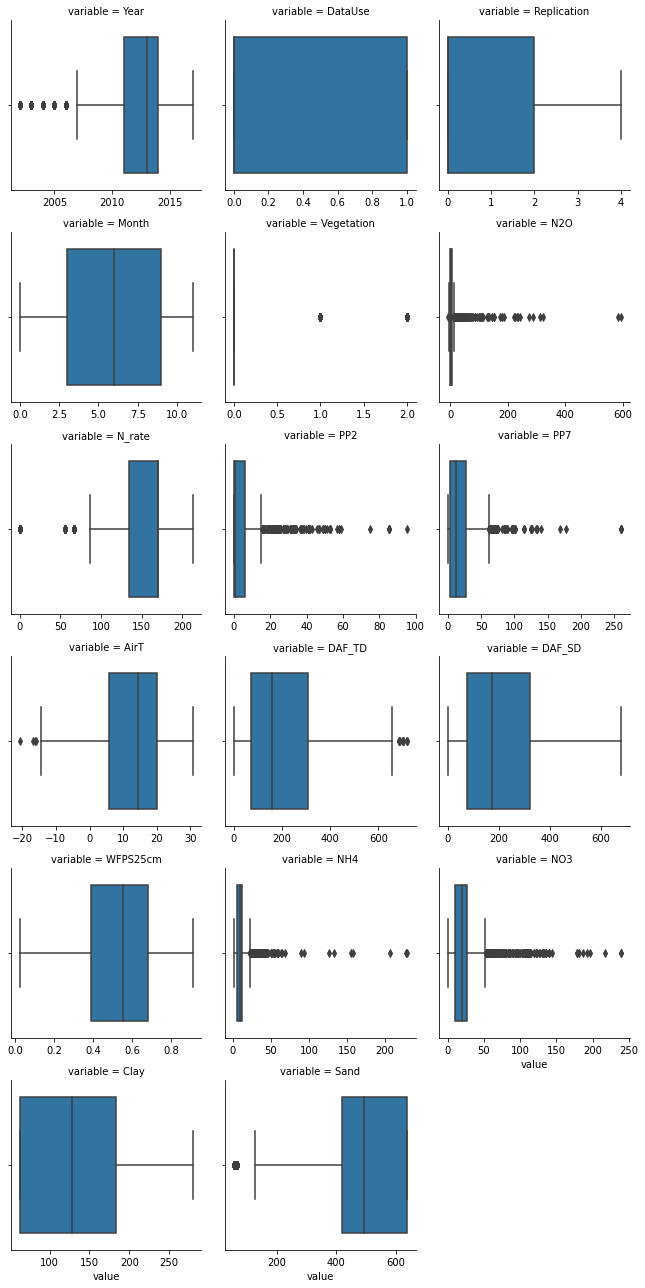

In [ ]:
unpivot = pd.melt(agno_df, agno_df.describe().columns[-1], agno_df.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

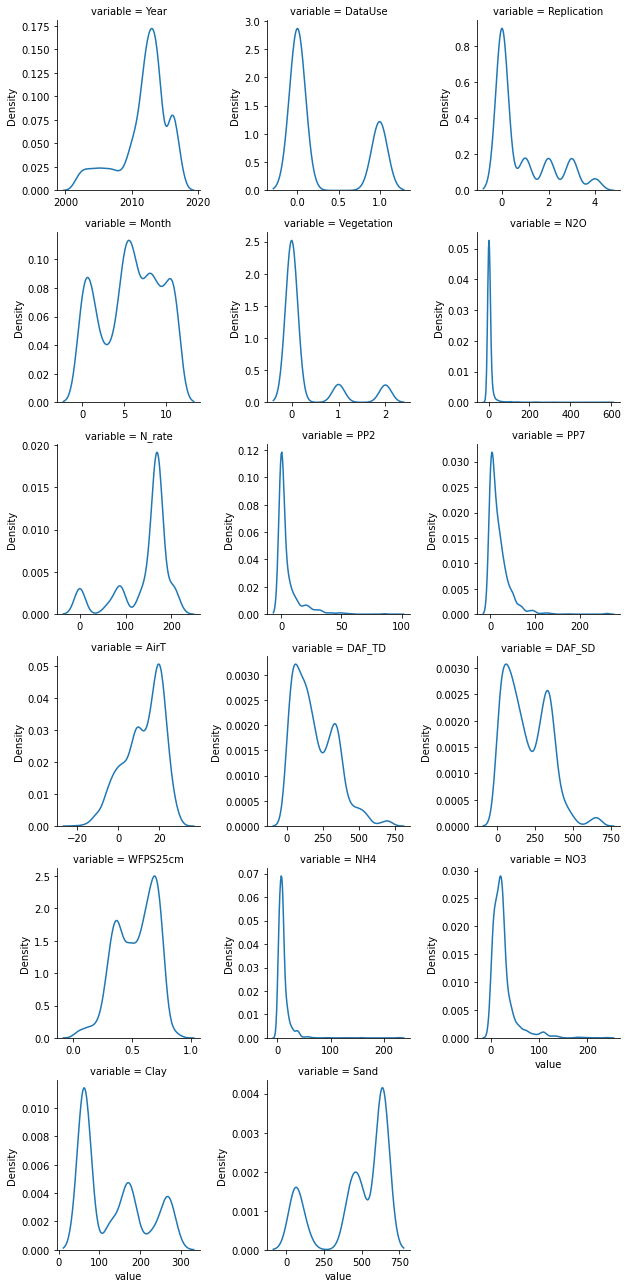

In [ ]:
unpivot = pd.melt(agno_df, agno_df.describe().columns[-1], agno_df.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

# Removal of null values with Mean values 

In [ ]:
agno_df.fillna(agno_df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


# Multivariate Analysis

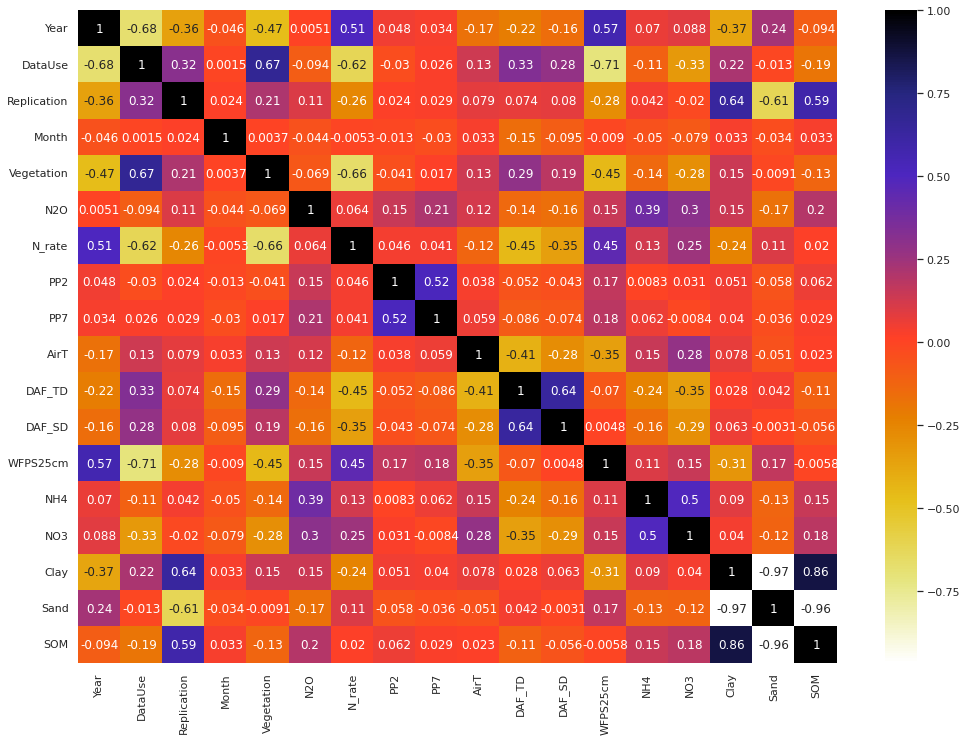

In [ ]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(agno_df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

SOM shows high correlation with Clay and Sand. Therefore, it should be dropped to minimise the effects on data linearity

We analyse the target feature against the time metrics like year or month.

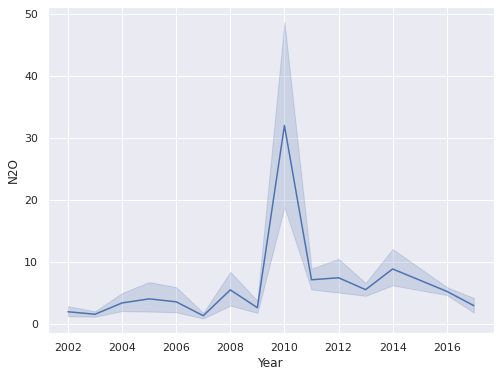

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=agno_df["Year"], y=agno_df["N2O"])

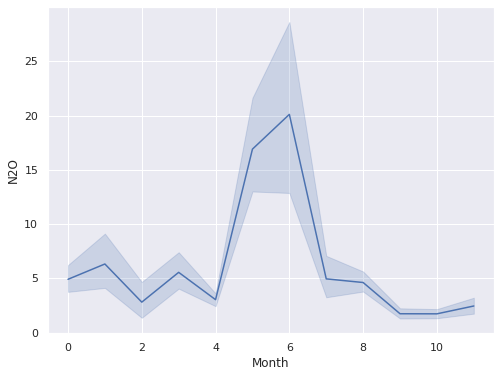

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=agno_df['Month'], y=agno_df['N2O'])

In [ ]:
agno_df=agno_df.drop(columns=['Experiment','VegType','SOM'])

In [ ]:
agno_df=agno_df.drop(columns=['Date'])

In [ ]:
agno_df.shape

(2246, 17)

In [ ]:
agno_df_copy=agno_df.copy()

# **Feature Selection**

In [ ]:
## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
def corr_based(X_train, y_train, X_test, x='all'):
  f_select = SelectKBest(score_func=f_regression, k='all')

  f_select.fit(X_train, y_train)
  X_train_fs_corr=f_select.transform(X_train)
  X_test_fs_corr=f_select.transform(X_test)

#plt.bar([i for i in range(len(f_select.scores_))], f_select.scores_)
#plt.show()

In [ ]:
def mutualinfo_based(X_train, y_train, X_test, x='all'):
  f_select = SelectKBest(score_func = mutual_info_regression, k=14)

  f_select.fit(X_train, y_train)
  X_train_fs_info= f_select.transform(X_train)
  X_test_fs_info= f_select.transform(X_test)
  
  return(X_train_fs_info, X_test_fs_info, f_select)
#plt.bar([i for i in range(len(f_select.scores_))], f_select.scores_)
#plt.show()

In [ ]:
## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics

# **Creating the Linear regression, Random Forest and XGBoost models**

In [ ]:
X = agno_df_copy.drop(["N2O"], axis=1)
y = agno_df_copy['N2O']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_fs, X_test_fs, fs_info = mutualinfo_based(X_train, y_train, X_test, x=13)

In [ ]:
linreg=LinearRegression()
linreg.fit(X_train_fs, y_train)
y_pred=linreg.predict(X_test_fs)

In [ ]:
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, y_pred)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 10.092
MSE: 594.370
RMSE: 24.380
R-Square: 0.216


In [ ]:
ranf=RandomForestRegressor()
ranf.fit(X_train_fs, y_train)
y_pred=ranf.predict(X_test_fs)

In [ ]:
mae_ranf = mean_absolute_error(y_test, y_pred)
mse_ranf = mean_squared_error(y_test, y_pred)
rmse_ranf = np.sqrt(mse_lranf)
rsq_ranf = r2_score(y_test, y_pred)

print('MAE: %.3f' % mae_ranf)
print('MSE: %.3f' % mse_ranf)
print('RMSE: %.3f' % rmse_ranf)
print('R-Square: %.3f' % rsq_ranf)

MAE: 6.160
MSE: 349.372
RMSE: 24.380
R-Square: 0.539


In [ ]:
xgb=XGBRegressor()
xgb.fit(X_train_fs, y_train)
y_pred=xgb.predict(X_test_fs)

[10:53:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, y_pred)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 6.751
MSE: 373.286
RMSE: 24.380
R-Square: 0.508


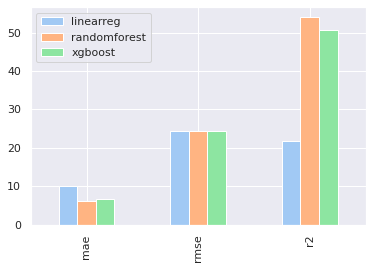

In [ ]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_ranf,
        "rmse": rmse_ranf,
        'r2': rsq_ranf*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1],  
                 sns.color_palette("pastel")[2]]);

After selecting top 13 features using mutual info regression, we observe that Random Forest performs better than Linear Regression and XGBoost. But XGBoost also can perform well if the hyperparameters are tuned.

# **Hyperparamter Tuning the XGBoost and Random Forest Models**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_rf={
    'criterion': ['squared_error','absolute_error'],
    'n_estimators': [20, 40],
    'min_samples_leaf': [3, 4],
    'max_depth':[40, 60]
    }

clf= GridSearchCV(ranf,
                  param_grid = params_rf, 
                  cv = 2,
                  n_jobs = -1,
                  verbose = 3)

In [ ]:
clf.fit(X_train_fs, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [40, 60], 'min_samples_leaf': [3, 4],
                         'n_estimators': [20, 40]},
             verbose=3)

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'criterion': 'absolute_error', 'max_depth': 40, 'min_samples_leaf': 4, 'n_estimators': 40}


In [ ]:
ranf = RandomForestRegressor(criterion= 'absolute_error',
                            max_depth = 45, 
                            min_samples_leaf = 2, 
                            n_estimators = 45)
ranf.fit(X_train_fs,y_train)
y_pred = ranf.predict(X_test_fs)

mae_ranf = mean_absolute_error(y_test, y_pred)
mse_ranf = mean_squared_error(y_test, y_pred)
rmse_ranf = np.sqrt(mse_ranf)
rsq_ranf = r2_score(y_test, y_pred)

print('MAE: %.3f' % mae_ranf)
print('MSE: %.3f' % mse_ranf)
print('RMSE: %.3f' % rmse_ranf)
print('R-Square: %.3f' % rsq_ranf)

MAE: 5.901
MSE: 321.701
RMSE: 17.936
R-Square: 0.576


In [ ]:
params_xgb={
    'criterion': ['squared_error','absolute_error'],
    'gamma':[1,10],
    'subsample':[0.5, 0.6, 0.7],
    'max_depth':[4,6,8]
    }

clf= GridSearchCV(xgb,
                  param_grid = params_xgb, 
                  cv = 2,
                  n_jobs = -1,
                  verbose = 3)

In [ ]:
clf.fit(X_train_fs, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[11:09:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'gamma': [1, 10], 'max_depth': [4, 6, 8],
                         'subsample': [0.5, 0.6, 0.7]},
             verbose=3)

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'criterion': 'squared_error', 'gamma': 10, 'max_depth': 8, 'subsample': 0.7}


In [ ]:
xgb = XGBRegressor(criterion= 'squared_error',
                            max_depth = 8, 
                            gamma =10,
                            subsample =0.7)
xgb.fit(X_train_fs,y_train)
y_pred = xgb.predict(X_test_fs)

mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, y_pred)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

[11:11:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 6.221
MSE: 357.216
RMSE: 18.900
R-Square: 0.529


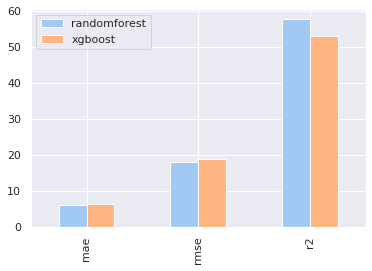

In [ ]:
error_rec = {
    "randomforest": {
        "mae": mae_ranf,
        "rmse": rmse_ranf,
        'r2': rsq_ranf*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1]]);

**Considering all the evaluation metrics, Random forest Model performed better than XGBoost model.**